In [ ]:
#Importing libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Importing dataset

In [21]:
df = pd.read_excel('tickets_consolidated_v1.xlsx',Sheets = 'Tickets_list')

In [22]:
df.head()

,Ticket ID+,Description,Request type
0,UKIM20010391116,Login id of user: cr529636 Duration of issue: ...,REMOVAL
1,UKIM20010395888,User contacted us amending that for the follow...,REPORT GENERATION
2,UKIM20010397139,User contacted us reporting that he cannot rem...,REMOVAL
3,UKIM20010397653,"Hi, I have a training assigned - Laboratory An...",REMOVAL
4,UKIM20010397766,SOP_52800 (7.0) Management of Records Manageme...,REMOVAL


In [23]:
df.shape

(1331, 3)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1331 entries, 0 to 1330
Data columns (total 3 columns):
Ticket ID+      1331 non-null object
Description     1331 non-null object
Request type    1331 non-null object
dtypes: object(3)
memory usage: 31.3+ KB


In [25]:
df2 = df.copy()

In [ ]:
#Dropping the ticketID column

In [26]:
df2.drop('Ticket ID+', axis=1, inplace = True)

In [27]:
df2.tail()

,Description,Request type
1326,Urgent - this is NOT an Item revision. Please ...,ITEM MODIFICATION
1327,URGENT - we are currently in Audit and we are ...,REPORT GENERATION
1328,External User’s contact information: “Set up u...,EXTERNAL USER CREATION
1329,Item Revision of MFG-040-LOC-US-L208110 and as...,ITEM REVISION
1330,This is the weekly RD Priority Written Standar...,ITEM REVISION


In [28]:
df2['Request type'].nunique() #has 10 classes

10

In [29]:
df2['Request type'].value_counts() #to maintain approximately equal number of samples in each class (avoiding class imbalance)

ITEM CREATION              182
REMOVAL                    170
RECORD CREDIT              165
REPORT GENERATION          163
ASSIGNMENT                 160
ITEM MODIFICATION          120
ITEM REVISION              106
EXTERNAL USER CREATION     106
CURRICULUM MODIFICATION    100
CURRICULUM CREATION         59
Name: Request type, dtype: int64

In [ ]:
#Converting ticket types to classes

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ticket_categories = le.fit_transform(df2['Request type'])

In [31]:
print(le.classes_)

['ASSIGNMENT' 'CURRICULUM CREATION' 'CURRICULUM MODIFICATION'
 'EXTERNAL USER CREATION' 'ITEM CREATION' 'ITEM MODIFICATION'
 'ITEM REVISION' 'RECORD CREDIT' 'REMOVAL' 'REPORT GENERATION']


In [32]:
df2['Ticket categories'] = ticket_categories

In [33]:
df2.head(10)

,Description,Request type,Ticket categories
0,Login id of user: cr529636 Duration of issue: ...,REMOVAL,8
1,User contacted us amending that for the follow...,REPORT GENERATION,9
2,User contacted us reporting that he cannot rem...,REMOVAL,8
3,"Hi, I have a training assigned - Laboratory An...",REMOVAL,8
4,SOP_52800 (7.0) Management of Records Manageme...,REMOVAL,8
5,Could you please remove from my Curriculum bel...,REMOVAL,8
6,We need to delete one of Our employees from th...,REMOVAL,8
7,"Hello, I need to define the following training...",ASSIGNMENT,0
8,User contacted us reporting that he left GSK i...,REMOVAL,8
9,User contacted SD becouse he is unable to fini...,RECORD CREDIT,7


In [34]:
df2.drop('Request type', axis=1, inplace = True)

In [35]:
df2.head()

,Description,Ticket categories
0,Login id of user: cr529636 Duration of issue: ...,8
1,User contacted us amending that for the follow...,9
2,User contacted us reporting that he cannot rem...,8
3,"Hi, I have a training assigned - Laboratory An...",8
4,SOP_52800 (7.0) Management of Records Manageme...,8


In [ ]:
#Train-Test-Split

In [36]:
X = df2['Description']
y = df2['Ticket categories']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 100)

In [39]:
X_train[0:5]

1182    External User’s contact information: “Set up u...
57      please mark complete, the system will not allo...
671     Please remove the CCAT learnings that are assi...
339     Please mark item BUS-SLD-SKF-2169 as completed...
425     Favor solicito un reporte de cumplimiento y no...
Name: Description, dtype: object

In [40]:
y_train[0:5]

1182    3
57      7
671     8
339     7
425     9
Name: Ticket categories, dtype: int32

In [41]:
len(X_train)

931

In [42]:
len(X_test)

400

In [ ]:
#Tokenization

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
vector = CountVectorizer()

In [45]:
vector.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [46]:
print(vector.get_feature_names())

['00', '000', '00000433612', '0001', '0002', '0003', '00032', '0004', '0005', '0007', '0008', '0009', '001', '0010', '0010_de', '0011', '0015', '0016', '0017', '0019', '001_ex', '001_jit_ex', '001c', '002', '0021', '0022', '0026', '0028', '0029', '003', '0033', '0034', '0035', '004', '0048', '005', '0058', '005_ex', '005_jit_ex', '006', '0065', '0066', '0069', '007', '008', '009', '0092', '0094', '0099', '01', '010', '0101', '0104v', '010a', '010nl017_hand', '010nl043_sop', '011', '012', '0125', '013', '0134', '014', '0141', '015', '016', '0168', '017', '0177', '018', '01895614749', '019', '01st', '02', '020', '0202_c001', '021', '022', '023', '024', '0240', '025', '026', '0262', '027', '0274', '028', '0282', '029', '03', '030', '030_qppv', '031', '032', '0325', '033', '033_01', '034', '035', '0351', '0369', '037', '038', '038ctl', '039', '04', '040', '0407', '0408', '041', '042', '045', '04535', '0456', '046', '048', '048_batch', '049', '0493', '05', '050', '051', '0515', '053', '054'

In [ ]:
#Function to remove mudIds and course Ids

In [47]:
featurenames = vector.get_feature_names()

In [48]:
len(featurenames) #5573 unique words across all tickets

5573

In [49]:
alphanumeric_list = []
def removemudID():
    for eachword in featurenames:
        #print(eachword)
        for i in range(0,len(eachword)):
            if eachword[i] in ['0','1','2','3','4','5','6','7','8','9']:
                alphanumeric_list.append(eachword)

removemudID()

In [50]:
print(alphanumeric_list) #List of numbers/mudids/courseids to be removed from document corpus

['00', '00', '000', '000', '000', '00000433612', '00000433612', '00000433612', '00000433612', '00000433612', '00000433612', '00000433612', '00000433612', '00000433612', '00000433612', '00000433612', '0001', '0001', '0001', '0001', '0002', '0002', '0002', '0002', '0003', '0003', '0003', '0003', '00032', '00032', '00032', '00032', '00032', '0004', '0004', '0004', '0004', '0005', '0005', '0005', '0005', '0007', '0007', '0007', '0007', '0008', '0008', '0008', '0008', '0009', '0009', '0009', '0009', '001', '001', '001', '0010', '0010', '0010', '0010', '0010_de', '0010_de', '0010_de', '0010_de', '0011', '0011', '0011', '0011', '0015', '0015', '0015', '0015', '0016', '0016', '0016', '0016', '0017', '0017', '0017', '0017', '0019', '0019', '0019', '0019', '001_ex', '001_ex', '001_ex', '001_jit_ex', '001_jit_ex', '001_jit_ex', '001c', '001c', '001c', '002', '002', '002', '0021', '0021', '0021', '0021', '0022', '0022', '0022', '0022', '0026', '0026', '0026', '0026', '0028', '0028', '0028', '0028'

In [ ]:
#Adding the alphanumeric_list to the stopwords

In [51]:
import nltk
from nltk.corpus import stopwords

In [52]:
new_stopwords = set(stopwords.words('english'))
new_stopwords.update(alphanumeric_list)     #Adding the mudids and course IDs to stopwords - to reduce the number of features

In [ ]:
'''Document Term Matrix/ Term Frequency Matrix'''

In [ ]:
#Tokenization of X_train and X_test - now including the new stopwords

In [53]:
vector_new = CountVectorizer(stop_words= new_stopwords)

In [54]:
vector_new.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words={'00', '000', '00000433612', '0001', '0002', '0003',
                            '00032', '0004', '0005', '0007', '0008', '0009',
                            '001', '0010', '0010_de', '0011', '0015', '0016',
                            '0017', '0019', '001_ex', '001_jit_ex', '001c',
                            '002', '0021', '0022', '0026', '0028', '0029',
                            '003', ...},
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [55]:
X_train_vec = vector_new.transform(X_train)
X_test_vec = vector_new.transform(X_test)

In [56]:
print(X_train_vec.shape)
print(X_test_vec.shape)

(931, 3892)
(400, 3892)


In [ ]:
#Multinomial Naive Bayes

In [57]:
from sklearn.naive_bayes import MultinomialNB

In [58]:
model_nb = MultinomialNB()

In [59]:
model_nb.fit(X_train_vec, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [60]:
y_pred_nb = model_nb.predict(X_test_vec)

In [61]:
model_nb.score(X_test_vec, y_test)

0.72

In [62]:
from sklearn.metrics import classification_report

In [63]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        44
           1       0.88      0.39      0.54        18
           2       0.44      0.62      0.52        24
           3       1.00      0.89      0.94        27
           4       0.61      0.77      0.68        57
           5       0.58      0.44      0.50        32
           6       0.66      0.61      0.63        38
           7       1.00      0.84      0.91        51
           8       0.71      0.71      0.71        59
           9       0.79      0.90      0.84        50

    accuracy                           0.72       400
   macro avg       0.74      0.69      0.70       400
weighted avg       0.74      0.72      0.72       400



In [ ]:
#Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
model_logistic = LogisticRegression()

In [66]:
model_logistic.fit(X_train_vec, y_train)

C:\Users\nandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
y_pred_logistic = model_logistic.predict(X_test_vec)

In [68]:
model_logistic.score(X_test_vec,y_test)

0.8025

In [69]:
print(classification_report(y_test,y_pred_logistic))

              precision    recall  f1-score   support

           0       0.70      0.80      0.74        44
           1       0.93      0.72      0.81        18
           2       0.54      0.62      0.58        24
           3       1.00      0.89      0.94        27
           4       0.83      0.86      0.84        57
           5       0.59      0.53      0.56        32
           6       0.80      0.74      0.77        38
           7       0.90      0.90      0.90        51
           8       0.87      0.78      0.82        59
           9       0.84      0.96      0.90        50

    accuracy                           0.80       400
   macro avg       0.80      0.78      0.79       400
weighted avg       0.81      0.80      0.80       400



In [ ]:
#SVM

In [70]:
from sklearn.svm import SVC

In [71]:
model_svc = SVC(kernel ='linear')

In [72]:
model_svc.fit(X_train_vec,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [73]:
y_pred_svc = model_svc.predict(X_test_vec)

In [74]:
model_svc.score(X_test_vec,y_test)

0.7675

In [75]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75        44
           1       0.80      0.89      0.84        18
           2       0.62      0.62      0.62        24
           3       1.00      0.89      0.94        27
           4       0.67      0.79      0.73        57
           5       0.42      0.50      0.46        32
           6       0.77      0.53      0.62        38
           7       0.88      0.86      0.87        51
           8       0.92      0.78      0.84        59
           9       0.92      0.90      0.91        50

    accuracy                           0.77       400
   macro avg       0.77      0.76      0.76       400
weighted avg       0.78      0.77      0.77       400



In [ ]:
'''Of the 3 models:
LogisticRegression > SVC (with linear kernel) > Multinomial NB
0.80 > 0.76 > 0.72'''

In [ ]:
#write the output to excel

In [79]:
def write_to_excel(y_predicted):
    y_predicted_classes = le.inverse_transform(y_predicted)
    output_df = pd.DataFrame()
    output_df['Ticket ID'] = df['Ticket ID+'].iloc[X_test.index]
    output_df['Description'] = X_test
    output_df['Predicted_classes'] = y_predicted_classes
    
    output_df.to_excel('Ticket-classification_output.xlsx', index= None)

In [80]:
write_to_excel(y_pred_logistic) #y_pred_svc the predicted values

In [ ]:
'''Tokenization using tf-Idf'''

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [82]:
vector_2 = TfidfVectorizer(stop_words = new_stopwords)

In [83]:
vector_2.fit(X)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words={'00', '000', '00000433612', '0001', '0002', '0003',
                            '00032', '0004', '0005', '0007', '0008', '0009',
                            '001', '0010', '0010_de', '0011', '0015', '0016',
                            '0017', '0019', '001_ex', '001_jit_ex', '001c',
                            '002', '0021', '0022', '0026', '0028', '0029',
                            '003', ...},
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [84]:
X_train_vec_2 = vector_2.transform(X_train)
X_test_vec_2 = vector_2.transform(X_test)

In [85]:
print(X_train_vec_2.shape)
print(X_test_vec_2.shape)

(931, 3892)
(400, 3892)


In [ ]:
#Multinomial NB

In [86]:
model_nb_2 = MultinomialNB()
model_nb_2.fit(X_train_vec_2,y_train)
y_pred_nb2 = model_nb_2.predict(X_test_vec_2)
print(model_nb_2.score(X_test_vec_2,y_test))
print(classification_report(y_test,y_pred_nb2))

0.69
              precision    recall  f1-score   support

           0       0.63      0.77      0.69        44
           1       0.00      0.00      0.00        18
           2       0.71      0.42      0.53        24
           3       1.00      0.89      0.94        27
           4       0.46      0.88      0.61        57
           5       0.74      0.44      0.55        32
           6       0.71      0.26      0.38        38
           7       0.93      0.80      0.86        51
           8       0.83      0.76      0.80        59
           9       0.71      0.96      0.81        50

    accuracy                           0.69       400
   macro avg       0.67      0.62      0.62       400
weighted avg       0.70      0.69      0.67       400



In [ ]:
#Logistic Regression

In [87]:
model_log_2 = LogisticRegression()
model_log_2.fit(X_train_vec_2,y_train)
y_pred_log2 = model_log_2.predict(X_test_vec_2)
print(model_log_2.score(X_test_vec_2,y_test))
print(classification_report(y_test,y_pred_log2))

0.785
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        44
           1       0.89      0.44      0.59        18
           2       0.64      0.58      0.61        24
           3       1.00      0.85      0.92        27
           4       0.73      0.86      0.79        57
           5       0.64      0.56      0.60        32
           6       0.82      0.61      0.70        38
           7       0.82      0.88      0.85        51
           8       0.86      0.85      0.85        59
           9       0.79      0.98      0.87        50

    accuracy                           0.79       400
   macro avg       0.79      0.74      0.75       400
weighted avg       0.79      0.79      0.78       400



C:\Users\nandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [ ]:
#SVC

In [88]:
model_svc_2 = SVC(kernel='linear')
model_svc_2.fit(X_train_vec_2,y_train)
y_pred_svc2 = model_svc_2.predict(X_test_vec_2)
print(model_svc_2.score(X_test_vec_2,y_test))
print(classification_report(y_test,y_pred_svc2))

0.815
              precision    recall  f1-score   support

           0       0.67      0.84      0.75        44
           1       0.92      0.61      0.73        18
           2       0.67      0.58      0.62        24
           3       1.00      0.89      0.94        27
           4       0.83      0.84      0.83        57
           5       0.65      0.69      0.67        32
           6       0.82      0.71      0.76        38
           7       0.87      0.88      0.87        51
           8       0.89      0.86      0.88        59
           9       0.87      0.94      0.90        50

    accuracy                           0.81       400
   macro avg       0.82      0.79      0.80       400
weighted avg       0.82      0.81      0.81       400



In [ ]:
'''if we use TF-IDF, SVC with linear kernel provides 81% accuracy
SVC > Logistic Regression > Multinomial NB
0.81 > 0.78> 0.69'''

In [100]:
#write_to_excel(y_pred_svc2) change the name of file before you run it again

In [146]:
'''From the classification reports, it is seen that class - 3 (External User creation) has highest precision and 
class 5 (Item Modification) has lowest precision. Can we conclude that when raising external user creation, most users use
same words to raise a request, but item modification request has differnet styles and words to raise a request?'''

In [ ]:
'''Comparing the models' for class-wise precision - CountVectorizer method'''

In [89]:
nb_precision_cv = np.array([0.7,0.88,0.44,1,0.61,0.58,0.68,1,0.71,0.79])
log_precision_cv = np.array([0.7,0.93,0.54,1,0.83,0.59,0.8,0.9,0.87,0.84])
svc_precision_cv = np.array([0.69,0.8,0.62,1,0.67,0.42,0.77,0.88,0.92,0.92])
classes = np.arange(0,10)

Text(0.5, 1.0, 'CountVectorizer method - Classes vs Precision')

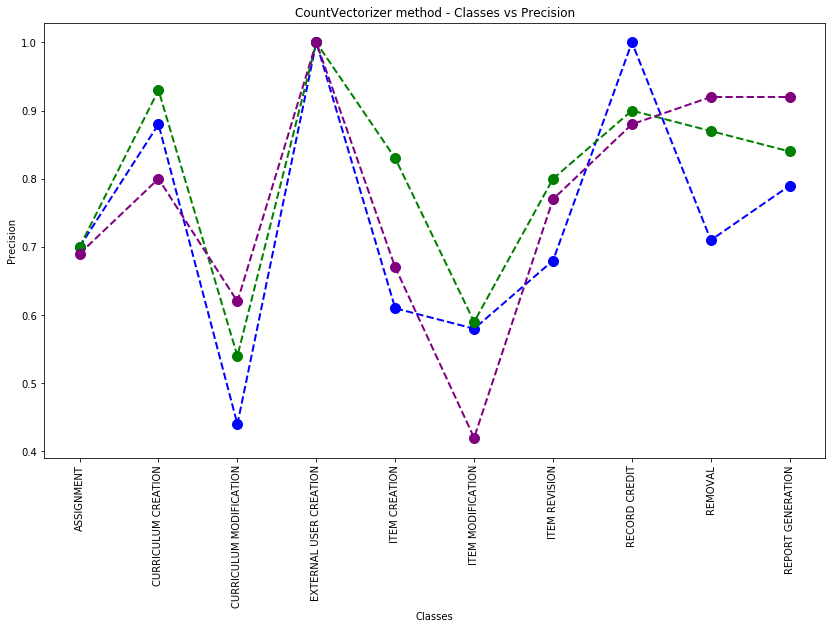

In [90]:
plt.figure(figsize=(14,8))
plt.plot(classes,nb_precision_cv,color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=10)
plt.plot(classes,log_precision_cv,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=10)
plt.plot(classes,svc_precision_cv,color='purple', marker='o', linestyle='dashed',linewidth=2, markersize=10)
plt.xticks(np.arange(0,10),labels=le.classes_,rotation=90)
plt.xlabel('Classes')
plt.ylabel('Precision')
plt.title('CountVectorizer method - Classes vs Precision')

In [ ]:
'''Comparing the models' for class-wise precision - TF-IDF method'''

In [91]:
nb_precision_tfidf = np.array([0.63,0,0.71,1,0.46,0.74,0.71,0.93,0.83,0.71])
log_precision_tfidf = np.array([0.73,0.89,0.64,1,0.73,0.64,0.82,0.82,0.86,0.79])
svc_precision_tfidf = np.array([0.67,0.92,0.67,1.00,0.83,0.65,0.82,0.87,0.89,0.87])

Text(0.5, 1.0, 'TF-IDF - Classes vs Precision')

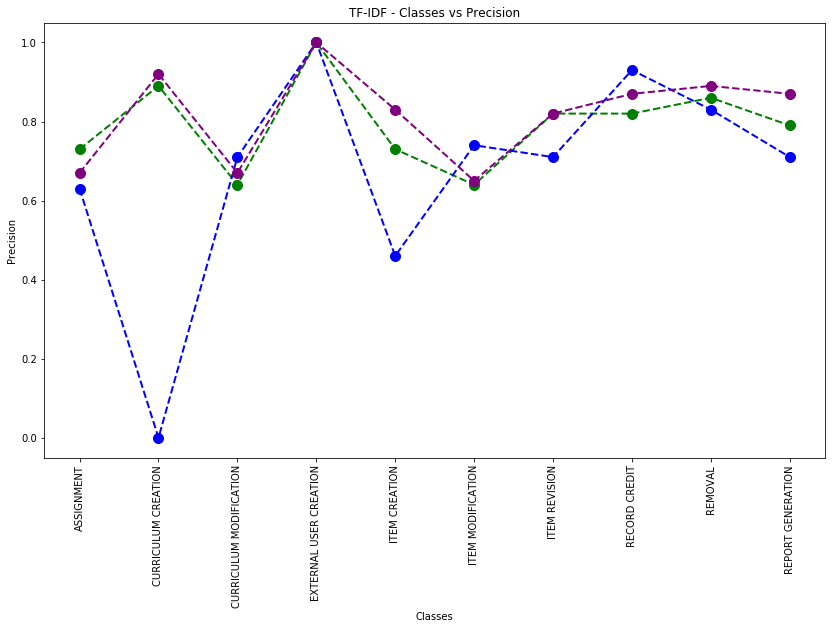

In [117]:
plt.figure(figsize=(14,8))
plt.plot(classes,nb_precision_tfidf,color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=10)
plt.plot(classes,log_precision_tfidf,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=10)
plt.plot(classes,svc_precision_tfidf,color='purple', marker='o', linestyle='dashed',linewidth=2, markersize=10)
plt.xticks(np.arange(0,10),labels=le.classes_,rotation=90)
plt.xlabel('Classes')
plt.ylabel('Precision')
plt.title('TF-IDF - Classes vs Precision')

In [ ]:
'''Inferences:
1. Precision is max for External User creation in all models
2. Precision is lowest in SVC model for Item modification at 0.42 in CountVectorizer method
3. Precision is 0 in Naive Bayes model for Curriculum creation in TF-IDF method (it could not predict even one curriculum creation correctly - possible that it was not a part of test data??)
4. Patterns appear to be similar - depends more on the data than the model itself'''


In [92]:
nb_recall_cv = np.array([0.70, 0.39,0.62,0.89,0.77,0.44,0.61,0.84,0.71,0.90])
log_recall_cv = np.array([0.80,0.72,0.62,0.89,0.86,0.53,0.74,0.90,0.78,0.96])
svc_recall_cv = np.array([0.82,0.89,0.62,0.89,0.79,0.50,0.53,0.86,0.78,0.90])

Text(0.5, 1.0, 'CountVectorizer method - Classes vs Recall')

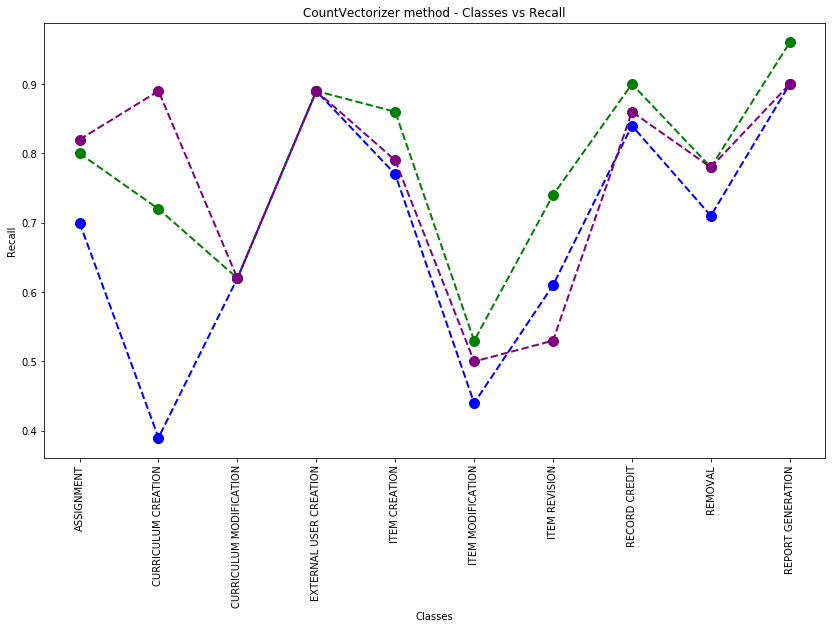

In [121]:
plt.figure(figsize=(14,8))
plt.plot(classes,nb_recall_cv,color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=10)
plt.plot(classes,log_recall_cv,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=10)
plt.plot(classes,svc_recall_cv,color='purple', marker='o', linestyle='dashed',linewidth=2, markersize=10)
plt.xticks(np.arange(0,10),labels=le.classes_,rotation=90)
plt.xlabel('Classes')
plt.ylabel('Recall')
plt.title('CountVectorizer method - Classes vs Recall')

In [93]:
nb_recall_tfidf = np.array([0.77,0.00,0.42,0.89,0.88,0.44,0.26,0.80,0.76,0.96])
log_recall_tfidf = np.array([0.80,0.44,0.58,0.85,0.86,0.56,0.61,0.88,0.85,0.98])
svc_recall_tfidf = np.array([0.84,0.61,0.58,0.89,0.84,0.69,0.71,0.88,0.86,0.94])

Text(0.5, 1.0, 'TF-IDF method - Classes vs Recall')

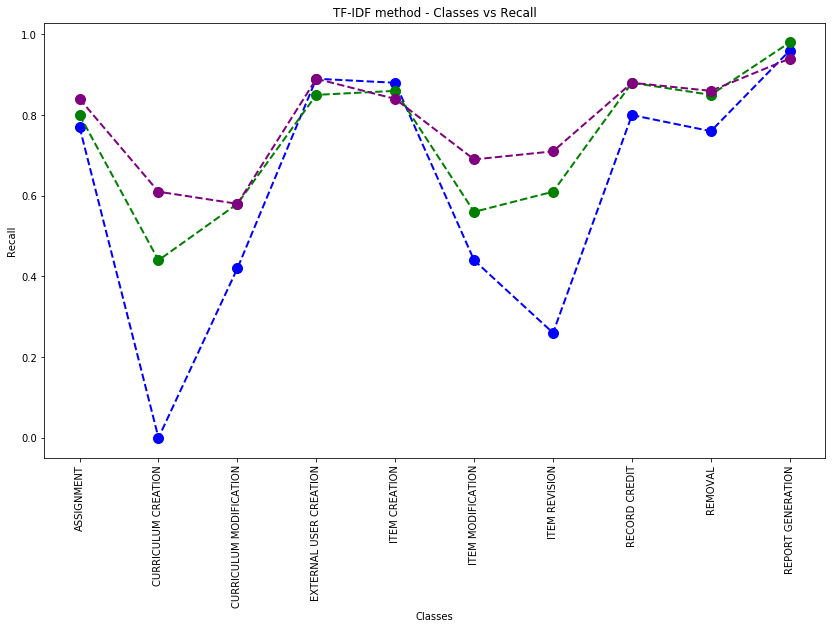

In [94]:
plt.figure(figsize=(14,8))
plt.plot(classes,nb_recall_tfidf,color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=10)
plt.plot(classes,log_recall_tfidf,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=10)
plt.plot(classes,svc_recall_tfidf,color='purple', marker='o', linestyle='dashed',linewidth=2, markersize=10)
plt.xticks(np.arange(0,10),labels=le.classes_,rotation=90)
plt.xlabel('Classes')
plt.ylabel('Recall')
plt.title('TF-IDF method - Classes vs Recall')

In [ ]:
'''Inferences'''